Bus Schedule Creator


Enter the origin:  MUNICH
Enter the destination:  SARRY
Enter the travel time from MUNICH to SARRY (in minutes):  45
Enter the terminal time at SARRY (in minutes):  10
Enter the headway (time interval between successive vehicles in minutes):  25
Enter the departure date (YYYY-MM-DD):  2024-01-01
Enter the start time for the schedule (HH:MM):  05:00
Enter the end time for the schedule (HH:MM):  22:00



Number of vehicles needed: 5
Adjusted cycle time: 125 minutes


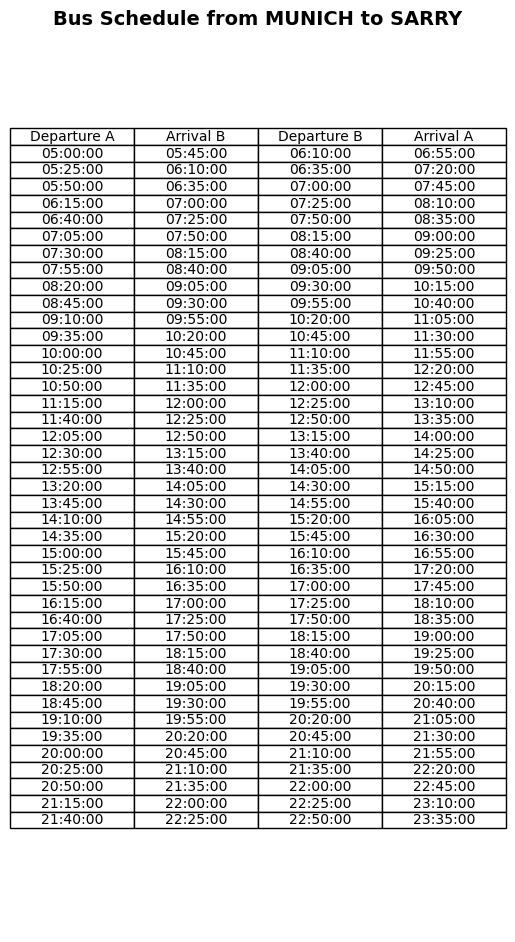

In [7]:
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

def get_time_input(prompt):
    """To ensure the time input is in HH:MM format."""
    while True:
        time_str = input(prompt)
        try:
            return datetime.strptime(time_str, '%H:%M').time()
        except ValueError:
            print("Invalid time format. Please use HH:MM.")

def get_date_input(prompt):
    """To ensure the date input is in YYYY-MM-DD format."""
    while True:
        date_str = input(prompt)
        try:
            return datetime.strptime(date_str, '%Y-%m-%d').date()
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD.")

def main():
    print("Bus Schedule Creator")

    # Input for origin and destination
    origin = input("Enter the origin: ")
    destination = input("Enter the destination: ")

    # Input for travel time (in minutes)
    travel_time = int(input(f"Enter the travel time from {origin} to {destination} (in minutes): "))
    
    # Input for terminal time (in minutes)
    terminal_time = int(input(f"Enter the terminal time at {destination} (in minutes): "))

    # Input for headway (time interval between successive vehicles in minutes)
    headway = int(input("Enter the headway (time interval between successive vehicles in minutes): "))

    # Get user input for departure date and start time
    departure_date = get_date_input("Enter the departure date (YYYY-MM-DD): ")
    start_time = get_time_input("Enter the start time for the schedule (HH:MM): ")

        # Calculate end time based on user input
    end_time = get_time_input("Enter the end time for the schedule (HH:MM): ")

    # Combine date and start time into a single datetime object
    current_departure_a = datetime.combine(departure_date, start_time)

         # Convert end_time to a datetime object for comparison
    end_datetime = datetime.combine(departure_date, end_time)

    # Calculate total cycle time
    total_cycle_time = 2 * (travel_time + terminal_time)

    # Calculate number of vehicles needed
    num_vehicles = total_cycle_time / headway
    if num_vehicles % 1 != 0:  # If not an integer
        num_vehicles = math.ceil(num_vehicles)  # Round up to next integer
        
        # Calculate additional time due to extra vehicle needed
        additional_time = (num_vehicles * headway) - total_cycle_time
        
        # Adjust terminal time at origin by adding additional time
        terminal_time += additional_time
        
        # Calculate adjusted cycle time
        adjusted_cycle_time = num_vehicles * headway
        
        print(f"\nNumber of vehicles needed: {num_vehicles}")
        print(f"Adjusted cycle time: {adjusted_cycle_time} minutes")
        
    else:
        # If number of vehicles is an integer, calculate normal cycle time
        print(f"\nNumber of vehicles needed: {int(num_vehicles)}")
        print(f"Cycle time: {total_cycle_time} minutes")

   
    # If end_time is earlier than start_time, set it to the next day
    if end_datetime < current_departure_a:
        end_datetime += timedelta(days=1)

    # Create schedule table
    schedule_data = []
    
    while current_departure_a <= end_datetime:
        # Calculate times based on current departure
        arrival_b = current_departure_a + timedelta(minutes=travel_time)      # Arrival at B
        departure_b = arrival_b + timedelta(minutes=terminal_time)            # Departure from B
        arrival_a = departure_b + timedelta(minutes=travel_time)              # Arrival at A

        # Append calculated times to schedule data
        schedule_data.append([
            current_departure_a.time(),
            arrival_b.time(),
            departure_b.time(),
            arrival_a.time()
        ])

        # Update departure time for the next vehicle using headway only
        current_departure_a += timedelta(minutes=headway)

    # Create a table using Matplotlib
    fig, ax = plt.subplots()
    
    # Hide axes
    ax.axis('tight')
    ax.axis('off')

    # Create table with headers and data
    table_data = [["Departure A", "Arrival B", "Departure B", "Arrival A"]] + schedule_data
    
    title_text = f"Bus Schedule from {origin} to {destination}"
    
    plt.subplots_adjust(top=2)  # Adjust top space to make room for title
    plt.text(0.5, 1, title_text, fontsize=14, fontweight='bold', ha='center', transform=ax.transAxes)

    table = ax.table(cellText=table_data, cellLoc='center', loc='center')

    # Display the table
    plt.show()

if __name__ == "__main__":
    main()
